In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data = pd.read_excel('data/Forbes Athlete List 2012-2019.xlsx')
data.head()

,Rank,Name,Pay,Salary/Winnings,Endorsements,Sport,Year
0,#1,Lionel Messi,$127 M,$92 M,$35 M,Soccer,2019
1,#2,Cristiano Ronaldo,$109 M,$65 M,$44 M,Soccer,2019
2,#3,Neymar,$105 M,$75 M,$30 M,Soccer,2019
3,#4,Canelo Alvarez,$94 M,$92 M,$2 M,Boxing,2019
4,#5,Roger Federer,$93.4 M,$7.4 M,$86 M,Tennis,2019


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             795 non-null    object
 1   Name             795 non-null    object
 2   Pay              795 non-null    object
 3   Salary/Winnings  795 non-null    object
 4   Endorsements     795 non-null    object
 5   Sport            795 non-null    object
 6   Year             795 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 43.6+ KB


In [5]:
data.Rank = data.Rank.apply(lambda x: int(x.split('#')[1]) if type(x) == np.str else x)
data.Pay = data.Pay.apply(lambda x: float(x.split(' ')[0].split('$')[1]))
data.Endorsements = data.Endorsements.apply(lambda x: float(x.split(' ')[0].split('$')[1]))

data['Salary/Winnings'].replace('-', '$nan M', inplace = True)
data['Salary/Winnings'] = data['Salary/Winnings'].apply(lambda x: float(x.split(' ')[0].split('$')[1]))

data.Sport.replace({"Soccer":"Football",
                  "Football":"American Football",
                 "Mixed Martial Arts":"MMA",
                 "Auto racing":"Racing",
                  "Auto Racing":"Racing",
                  "Basketbal":"Basketball",
                 },inplace=True)

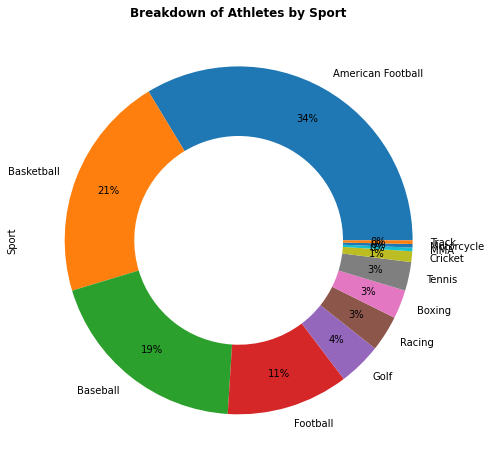

In [8]:
data.groupby("Name").first()["Sport"].value_counts().plot(kind="pie",autopct="%.0f%%",figsize=(8,8),wedgeprops=dict(width=0.4),pctdistance=0.8)
plt.title("Breakdown of Athletes by Sport",fontweight="bold")
plt.show()

In [9]:
data.Year = pd.to_datetime(data.Year, format='%Y')
racing_bar = data.pivot_table(values='Pay', index='Year', columns='Name')

In [10]:
racing_bar.columns[racing_bar.isnull().sum() == 0]

Index(['Carmelo Anthony', 'Cristiano Ronaldo', 'Dwight Howard',
       'Justin Verlander', 'LeBron James', 'Lionel Messi', 'Phil Mickelson',
       'Rafael Nadal', 'Roger Federer', 'Tiger Woods'],
      dtype='object', name='Name')

In [11]:
racing_bar_filled = racing_bar.interpolate(method='linear').fillna(method='bfill')
racing_bar_filled.cumsum()

Name,A.J. Burnett,A.J. Green,Aaron Donald,Aaron Rodgers,Adam Wainwright,Adrian Gonzalez,Adrian Peterson,Al Horford,Albert Pujols,Alex Rodriguez,...,Virat Kohli,Von Miller,Wayne Rooney,Wladimir Klitschko,Yaya Touré,Yoenis Cespedes,Zach Randolph,Zack Greinke,Zack Grienke,Zlatan Ibrahimovic
Year,,,,,,,,,,,,,,,,,,,,,
2012-01-01,16.6,33.3,41.4,49.00,19.8,21.20,21.5,28.1,17.400000,33.000000,...,22.0,28.1,24.3,28.0,19.1,23.8,17.0,23.7,21.7,19.7
2013-01-01,33.2,66.6,82.8,98.00,39.6,42.40,43.0,56.2,37.633333,63.300000,...,44.0,56.2,45.4,52.0,39.8,47.6,34.0,47.4,43.4,39.4
2014-01-01,49.8,99.9,124.2,120.00,59.4,63.75,64.5,84.3,60.700000,90.533333,...,66.0,84.3,68.8,80.0,61.5,71.4,52.8,71.1,65.1,79.8
2015-01-01,66.4,133.2,165.6,139.10,79.2,85.25,86.0,112.4,86.600000,114.700000,...,88.0,112.4,95.7,101.5,81.5,95.2,71.6,94.8,86.8,118.9
2016-01-01,83.0,166.5,207.0,175.75,99.0,106.65,107.5,140.5,112.900000,135.800000,...,110.0,140.5,121.8,123.0,101.5,119.0,90.4,119.5,108.5,156.3
2017-01-01,99.6,199.8,248.4,229.95,118.8,128.35,129.0,168.6,140.200000,156.900000,...,132.0,168.6,145.4,144.5,121.5,143.5,109.2,143.6,130.2,188.3
2018-01-01,116.2,233.1,289.8,301.70,138.6,150.05,150.5,198.4,170.500000,178.000000,...,156.0,203.7,172.4,166.0,141.5,168.7,128.0,167.8,151.9,220.3
2019-01-01,132.8,266.4,331.2,391.00,158.4,171.75,172.0,230.4,198.500000,199.100000,...,181.0,238.8,199.4,187.5,161.5,198.1,146.8,192.0,173.6,252.3


In [12]:
racing_bar_filled = racing_bar_filled.resample("1D").interpolate(method="linear")[::7]

MovieWriter imagemagick unavailable; using Pillow instead.


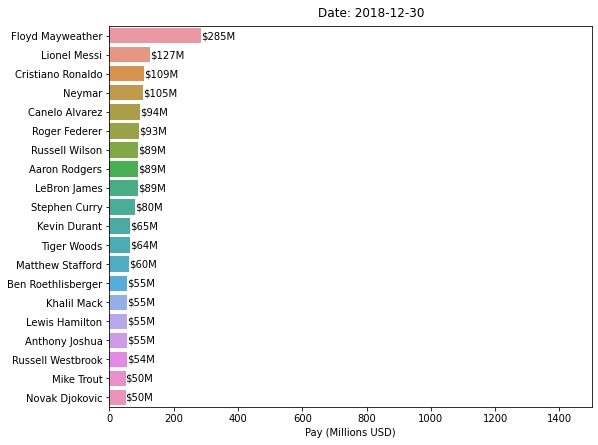

In [16]:
from matplotlib.animation import FuncAnimation, FFMpegWriter

selected  = racing_bar_filled.iloc[-1,:].sort_values(ascending=False)[:20].index
data = racing_bar_filled[selected].round()

fig,ax = plt.subplots(figsize=(9.3,7))
fig.subplots_adjust(left=0.18)
no_of_frames = data.shape[0] #Number of frames

#initiate the barplot with the first rows of the dataframe
bars = sbn.barplot(y=data.columns,x=data.iloc[0,:],orient="h",ax=ax)
ax.set_xlim(0,1500)
txts = [ax.text(0,i,0,va="center") for i in range(data.shape[1])]
title_txt = ax.text(650,-1,"Date: ",fontsize=12)
ax.set_xlabel("Pay (Millions USD)")
ax.set_ylabel(None)

def animate(i):
#     print(f"i={i}/{no_of_frames}")
    #get i'th row of data 
    y = data.iloc[i,:]
    
    #update title of the barplot axis
    title_txt.set_text(f"Date: {str(data.index[i].date())}")
    
    #update elements in both plots
    for j, b, in enumerate(bars.patches):
        #update each bar's height
        b.set_width(y[j])
        
        #update text for each bar (optional)
        txts[j].set_text(f"${y[j].astype(int)}M")
        txts[j].set_x(y[j])

anim=FuncAnimation(fig,animate,repeat=False,frames=no_of_frames,interval=1,blit=False)
anim.save('athletes.gif', writer='imagemagick', fps=120)
plt.close(fig)